In [1]:
# TUKE - Katedra kybernetiky a umelej inteligencie
# Maroš Stredanský
# Strojové učenie

# SVM - Support vector machine

In [26]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [27]:
dataset = pd.read_csv("FB.csv")
dataset.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-02,194.029999,196.570007,188.850006,196.440002,196.440002,24949000
1,2020-03-03,196.220001,197.240005,183.970001,185.889999,185.889999,27984100
2,2020-03-04,189.169998,191.830002,186.389999,191.759995,191.759995,23062500
3,2020-03-05,186.779999,188.990005,183.889999,185.169998,185.169998,19333400
4,2020-03-06,178.330002,183.779999,176.259995,181.089996,181.089996,24559600
5,2020-03-09,169.600006,175.000000,165.190002,169.500000,169.500000,29949000
6,2020-03-10,174.669998,178.289993,169.500000,178.190002,178.190002,24517800


In [28]:
dates = []
prices = []
#riadky | stlpce
dataset.shape

(21, 7)

In [29]:
dataset.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
20,2020-03-30,159.179993,166.75,158.059998,165.949997,165.949997,22515200


In [30]:
dataset = dataset.head(len(dataset)-1)
print(dataset.shape)

dataset_dates = dataset.loc[:,'Date'] 
#get all of the rows from the Date column


(20, 7)


In [31]:
dataset_open = dataset.loc[:,'Open']
#get all of the rows from the Open column

In [32]:
# Create the independent data set 'X' as dates
for date in dataset_dates:
    dates.append( [int(date.split('-')[2])])


In [33]:
#Create the dependent data set 'Y' as prices
for open_price in dataset_open:
    prices.append(float(open_price))

In [34]:
print(dates)

[[2], [3], [4], [5], [6], [9], [10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [25], [26], [27]]


In [35]:
def prediction_model(dates, prices, x):
  
  #Create 3 Support Vector Regression Models
  svr_lin = SVR(kernel='linear', C=1e3)
  svr_poly = SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
  
  #Train the models on the dates and prices
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates, prices)
  svr_rbf.fit(dates, prices)
  
  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color = 'black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color = 'red', label='RBF model')
  plt.plot(dates, svr_lin.predict(dates), color = 'green', label='Linear model')
  plt.plot(dates, svr_poly.predict(dates), color = 'blue', label='Polynomial model')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('Support Vector Regression')
  plt.legend()
  plt.show()
  
  #return all three model predictions
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

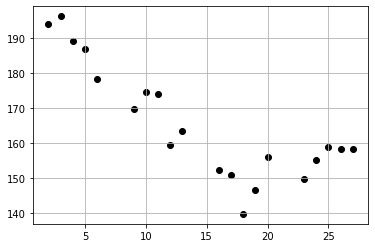

In [36]:
plt.scatter(dates, prices, color = 'black', label='Data')
plt.grid()
plt.show()

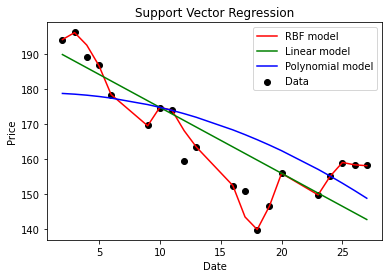

(158.09994043429575, 142.7250082002716, 148.79523043280756)


In [37]:
future_price = prediction_model(dates, prices, [[27]])
print(future_price)